In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as pl
import scipy
from scipy.optimize import leastsq
from scipy import stats

In [10]:
data = pd.read_csv("homework12.csv")
data

,date,day_number,A,B
0,2.20,0,100,100
1,5.13,100,250,203
2,8.21,200,304,214
3,11.29,300,403,295
4,3.80,400,446,330
5,6.16,500,482,324


/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


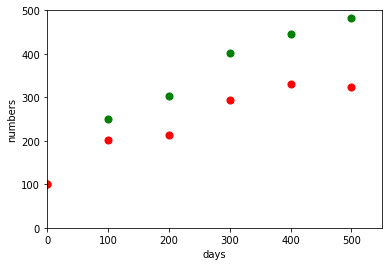

In [11]:
X = data["day_number"]
Y1 = data["A"]
Y2 = data["B"]

plt.figure()
plt.xlabel(u"days")
plt.ylabel(u"numbers")
plt.axis([0, 550, 0, 500])
plt.scatter(X, Y1, marker="o",color="g", s=50)
plt.scatter(X, Y2, marker="o",color="r", s=50)
plt.show()


Fitting Parameters1 ： [ -1.09461847e-03   1.28922764e+00   1.08896241e+02] 
 std_1: 142.731099157
Fitting Parameters2 ： [ -8.04250681e-04   8.54236000e-01   1.04521225e+02] 
 std_2: 89.1216397216


/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


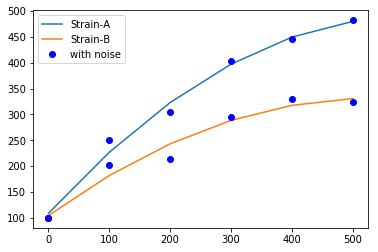

In [13]:
m = 3
def fake_func(p, x):
    f = np.poly1d(p)
    return f(x)
def residuals(p, y, x):
    return y - fake_func(p, x)
x = X
x_show = X
y1 = [np.random.normal(0, 0.1) + y for y in Y1]
y2 = [np.random.normal(0, 0.1) + y for y in Y2]

p0 = np.random.randn(m)

plsq = leastsq(residuals, p0, args=(y1, x))
plsq2 = leastsq(residuals, p0, args=(y2, x))

std_1 = np.std(Y1, ddof=1)
std_2 = np.std(Y2, ddof=1)

print('Fitting Parameters1 ：', plsq[0], "\n", "std_1:", std_1)
print('Fitting Parameters2 ：', plsq2[0], "\n", "std_2:", std_2) 
 

plt.plot(x_show, fake_func(plsq[0], x_show), label='A')
plt.plot(x_show, fake_func(plsq2[0], x_show), label='B')
plt.plot(x, y1, 'bo', label='with noise')
plt.plot(x, y2, 'bo')
plt.legend()
plt.show()

In [14]:
stats.levene(Y1, Y2)

LeveneResult(statistic=1.3238336369530981, pvalue=0.27667508704468685)

In [15]:
stats.ttest_ind(Y1, Y2)

Ttest_indResult(statistic=1.2591710433748455, pvalue=0.23656639305657989)

### pvalue=0.2365663930565799 > 0.05的值, so we accept H0.
It means, in the unfavorable environment, the survival rate of the cross-bred was greater than cin-bed.